# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
В задании вы будете решать задачу бинарной классификации текстов. Вы познакомитесь с основными инструментами sklearn, необходимыми для обработки текстов. Перед применением методов sklearn внимательно читайте документацию к ним: это полезно и помогает делать меньше ошибок.

**Общая информация**

**Срок сдачи:** 1 мая 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com`, X = 3 или 4 (ИАД 3 или ИАД4), указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [HW2, ИАД-X] Фамилия Имя **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
__Старайтесь не копировать похожие участки кода. Везде, где это возможно, оформляйте код в функцию.__

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
name = "БобровскихГлеб" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<p><b>Варианты</b></p>

В зависимости от варианта нужно будет научиться определять...

**1.** ...является ли SMS сообщение спамом? 
* Зайдите на [страничку с данными](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) на сайте репозитория UCI.
* Нажмите на «Data Folder», скачайте и распакуйте архив.
* Открыть SMSSpamCollection можно с помощью pd.read_csv, указав `sep='\t'`.

**2.** ...положительна или отрицательна рецензия на фильм?
* Зайдите на [страничку с данными](http://www.cs.cornell.edu/people/pabo/movie-review-data/) на сайте Корнельского университета.
* Нажмите на «polarity dataset v2.0» и распакуйте архив. 
* Каждый текстовый файл соответствует одной рецензии. Вам придётся [построить список всех файлов в папке](http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory), а затем последовательно открыть их и прочитать тексты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
def convert_text(s):
    # Removes all characters from string except letters and digits and convert letters to lowercase
    return re.sub("[^a-zA-Z0-9]", " ", s.lower())
#explain regular expression:
#

In [32]:
from os import listdir
from os.path import isfile, join
mypath = '/home/bobrg/anaconda3/txt_sentoken/pos'
txt = []
txt = [convert_text(open(join(mypath, f), 'r').read())for f in listdir(mypath)
             if isfile(join(mypath, f))]
labels = [1] * len(txt)
mypath = '/home/bobrg/anaconda3/txt_sentoken/neg'
txt.extend([convert_text(open(join(mypath, f), 'r').read()) for f in listdir(mypath)
                               if isfile(join(mypath, f))])
labels.extend([0] * (len(onlyfiles) - len(labels)))

In [33]:
len(txt)

2000

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные --- список текстов и список соответствующих им меток</li>
    <li>Разбейте объекты на обучающее (train) и тестовое подможества (test) в пропорции 7:3</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настраивать только на обучающем подмножестве, n-gram=1, слова приведите в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [34]:
random_state = 12345 # для всех объектов/методов/моделей

Параметры логистической регрессии
```
penalty='l2'
fit_intercept=True
max_iter=100
C=1
solver="lbfgs"
random_state=12345
```

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(txt, labels, test_size=0.3)

In [36]:
len(X_train) / len(txt)

0.7

### Векторизация текстов

EXPAND!

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 1))
df = pd.DataFrame(data=count_vec.fit_transform(X_train).toarray(),
                  columns=count_vec.get_feature_names())

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(use_idf=False)
df_train = transformer.fit_transform(np.asarray(df))

Another way to make transformation:
```
from sklearn.feature_extraction.text import TfidfVectorizer 
df_train = TfidfVectorizer(lowercase=True,ngram_range=(1,1)).fit_transform(X_train)
```

Add sparse matrix explanation

In [39]:
df_train

<1400x34188 sparse matrix of type '<class 'numpy.float64'>'
	with 469519 stored elements in Compressed Sparse Row format>

### Обучение моделей:
* KNN
* LogisticRegression
* MultinomialNaiveBayes

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(df_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
%timeit knc.fit(df_train, y_train)

100 loops, best of 3: 2.13 ms per loop


In [42]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=1, solver="lbfgs", random_state=12345)
logr.fit(df_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
%timeit logr.fit(df_train, y_train)

1 loop, best of 3: 324 ms per loop


In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(df_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
%timeit mnb.fit(df_train, y_train)

100 loops, best of 3: 7.24 ms per loop


### Построение прогноза на тестовой подвыборке.
Векторизуем тексты из теста и проверим предсказания обученых моделей.

In [90]:
df_1 = transformer.transform(count_vec.transform(X_test))
df_1

<600x34188 sparse matrix of type '<class 'numpy.float64'>'
	with 191310 stored elements in Compressed Sparse Row format>

In [76]:
yy_knc = knc.predict(df_1)

In [47]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print('mae:', mean_absolute_error(yy_knc, y_test))
print('accuracy score', accuracy_score(yy_knc, y_test))

mae: 0.463333333333
accuracy score 0.536666666667


In [17]:
%timeit knc.predict(df_1)

1 loop, best of 3: 264 ms per loop


In [48]:
yy_lgr = logr.predict(df_1)

In [49]:
print('mae:', mean_absolute_error(yy_lgr, y_test))
print('accuracy score:', accuracy_score(yy_lgr, y_test))

mae: 0.261666666667
accuracy score: 0.738333333333


In [100]:
%timeit logr.predict(df_1)

1000 loops, best of 3: 527 µs per loop


µs - microseconds - WOW! :D

In [50]:
yy_mnb = mnb.predict(df_1)

In [51]:
print('mae:', mean_absolute_error(yy_mnb, y_test))
print('accuracy score:', accuracy_score(yy_mnb, y_test))

mae: 0.273333333333
accuracy score: 0.726666666667


In [99]:
%timeit mnb.predict(df_1)

1000 loops, best of 3: 1.4 ms per loop


### Пояснения по результатам:

Fitting time:
* Дольше всего настраивается Логистическая регрессия, поскольку ей нужно настроить параметры сигмоиды, чтобы максимизировать функцию правдоподобия. Для этого применяется метод градиентного спуска, который и дает проигрыш во времени настройки.
* Меньше всего времени на настройку тратит модель K Nearest Neighbours, поскольку она лишь запоминает выборку.

Prediction time:
На предсказании модели ведут себя противоположно своему поведению на настройке, т.е.:
* Дольше всего предсказывает модель KNN, поскольку она должна померить расстояния евклидовой метрикой для каждого элемента из теста и каждого элемента из заученого трейна.
* Меньше времени тратит Логистическая регрессия, поскольку ????

What about MNB? (TODO: Expand)

## Задача 2.
#### Применение k-folds (3 балла)

<p>1. Повторите решение задачи 1, но вместо одного разделения на обучение и контроль используйте разбиение k-folds (k=4). Вам понадобится повторить все действия 4 раза. <br>
2. Какой классификатор показывал лучшее/худшее качество на тестовой выборке? А при k-folds разбиении? Как вы думаете, обязательно ли в данной задаче оценивать качество на кросс-валидации, или достаточно отложить контрольную выборку и оценивать качество на ней?</p>

In [52]:
random_state = 12345 # для всех объектов/методов/моделей

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer 
#to reduce code :D

In [56]:
from sklearn.model_selection import KFold
def kfold(model, data, labels, k):
    tmp_model = model
    tfidfvec = TfidfVectorizer(lowercase=True, ngram_range=(1,1))
    kfld = KFold(n_splits=k, random_state=12345, shuffle=True)
    
    y_pred = np.zeros(len(labels))
    
    for i_train, i_test in kfld.split(data):
        tmp = tfidfvec.fit_transform(data[i_train])
        
        X_train, X_test = tmp, tfidfvec.transform(data[i_test])
        
        y_train = labels[i_train]
        
        tmp_model.fit(X_train, y_train)
        
        y_pred[i_test] = tmp_model.predict(X_test)
    print(accuracy_score(y_pred, labels))

In [57]:
print('-------------------KNN--------------------')
kfold(knc, np.asarray(onlyfiles), np.asarray(labels), 4)
print('-------------------LR--------------------')
kfold(logr, np.asarray(onlyfiles), np.asarray(labels), 4)
print('-------------------MNB--------------------')
kfold(mnb, np.asarray(onlyfiles), np.asarray(labels), 4)

-------------------KNN--------------------
0.575
-------------------LR--------------------
0.8195
-------------------MNB--------------------
0.7935


### Пояснения по результатам:

KFold разбиение на 4 фолдах улучшело результат предсказания моделей, но если с KNN (при k = 5) улучшение заметное, то с Логистической регрессией и Наивным Байесом улучшения едва заметны.
(WHY? TODO: Expand)

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Рассмотрим следующие варианты значений гиперпараметров для наших классификаторов:  </p>

<p>K-ближайших соседей</p>

In [58]:
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [59]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [60]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

<p style="padding-left:15px;"> Найдите оптимальные значения гиперпараметров для классификаторов на кросс-валидации. Для этого постройте графики (гиперпараметр)-(качество) на обучении и валидации. <br> _Пояснение:_ вы разбили обучающую выборку на 4 блока. Для каждого значения гиперпараметра 4 раза повторите следующее: берем 3 блока для обучения, по ним настраиваем  TfIdf и обучаем классификатор, считаем качество на этих блоках (качество на обучении) и на оставшемся (качество на валидации). Итоговое значение качества на обучении для данного значения гиперпараметра - это среднее четырех полученных значений качества на обучении, то же самое с итоговым значением качества на валидации.  <br>
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
4. Повторите шаги 2-4 для n-gram=2<br>
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
6. Сделайте выводы по полученным результатам: <ul>
<li>какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?</li>
<li>велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?</li>
<li>что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.</li>
<li>есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?</li>
</ul></p>

In [29]:
random_state = 12345 # для всех объектов/методов/моделей

### Определим гиперпараметры моделей.
Создадим функцию, чтобы избежать дубликации кода (DRY) и последовательно замеряем с ней, как зависит 
результат предсказания модели от разных параметров. Выборку в этот раз возьмем тренировочную, которую
определили в задании 1 и поделим ее на 4-ре фолда на 3-ех из которых будем обучать модель, а на оставшемся
валидироваться. Для определения результата обучения и валидации на выборке возьмем среднее по полученным
результатам. Повторяем замеры для каждого параметра.

In [61]:
def hyperparams_info(model, data, labels, ngrams):
    tmp = model
    kfld=KFold(n_splits=4, random_state=12345, shuffle=True)
    qual_train = []
    qual_valid = []
    
    for i_tr, i_tst in kfld.split(data):
        tfidfvec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
        tfidf_tr = tfidfvec.fit_transform(data[i_tr])
        tmp.fit(tfidf_tr, labels[i_tr])
        qual_train.append(accuracy_score(tmp.predict(tfidf_tr), labels[i_tr]))
        qual_valid.append(accuracy_score(tmp.predict(tfidfvec.transform(data[i_tst])), labels[i_tst]))
        
        #print('-train indexes:', i_tr,
        #      '-validation indexes: ', i_tst, 
        #      '-train accuracy score: ', qual_train[-1],
        #      '-validation accuracy score: ', qual_valid[-1], sep='\n')
        #print()
        
    return np.mean(qual_train), np.mean(qual_valid)

def plotting(train, valid, param, model_name):
    fig1 = plt.figure(figsize=(8,8))
    ax1 = plt.subplot()
    ax1.plot(param, train, label='Train')
    ax2 = plt.subplot()
    ax2.plot(param, valid, label='Validation')
    plt.legend(loc=1, ncol=1)
    plt.xlabel('Parameter')
    plt.ylabel('Quality')
    plt.title(model_name)

def time_measure(model, data, labels, ii):
    print('--->{}\n fitting time:'.format(model))
    %timeit model.fit(data, labels)
    print('prediction time:')
    %timeit model.predict(data, labels)

------------------TRAIN_KFOLD------------------
ngrams - (1, 1)
n-neigbours - 21.0
result validation - 0.7142857142857142
result train - 0.7142857142857143


/home/bobrg/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1400]

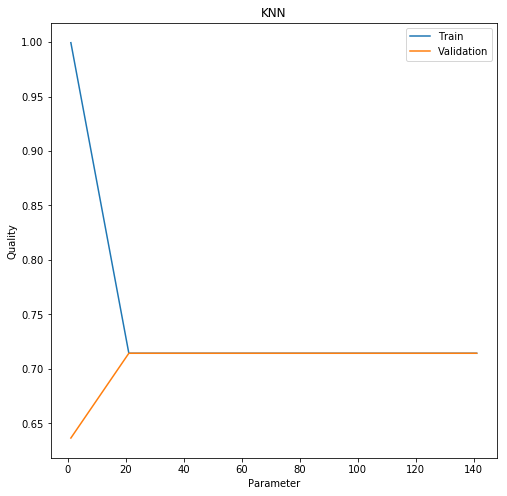

In [92]:
#KNearestNeighbors
qual = np.zeros((len(ns), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in ns:
        knc_ = KNeighborsClassifier(n_neighbors=i)
        qual[j][0], qual[j][1] = hyperparams_info(knc_, np.asarray(X_train), np.asarray(labels), ngrams)
        qual[j][2] = i
        j += 1
    plotting([k[0] for k in qual], [k[1] for k in qual], ns, 'KNN')
        
    tmp = max(qual, key=lambda a: a[1])
    print('------------------TRAIN_KFOLD------------------',
          'ngrams - {}'.format(ngrams),
          'n-neigbours - {}'.format(tmp[-1]),
          'result validation - {}'.format(tmp[1]),
          'result train - {}'.format(tmp[0]),
          sep = '\n'
         )
    knc_ = KNeighborsClassifier(n_neighbors=tmp[-1])
    knc_.fit(X_train, y_train)
    y_pred = knc_.predict(X_test)
    print('------------------TRAIN+TEST------------------',
          'n-neigbours - {}'.format(tmp[-1]),
          'Result: {}'.format(accuracy_score(y_test, y_pred))
         )

При одном соседе модель просто выучила обучающую выборку и очень плохо отработала на валидации, что и ожидаемо.
Начиная с 61 соседа качество не менялось.

------------------TRAIN_KFOLD------------------
ngrams - (1, 1)
C - 0.01
result validation - 0.7142857142857142
result train - 0.7142857142857143


ValueError: could not convert string to float: 'an energetic   visually stunning   but intellectually hollow recreation of the mysterious life of jeanne d arc    in history jeanne d arc is lost in an ocean of mystery and controversy   which creates the perfect launching pad for talented and creative directors   who can basically alter the story as they wish    she came in a time where people desperately needed a saint    a hero that could rescue them for misery and deliver peace and happiness    director writer luc besson    nikita     leon    portrays his version of the peasant girl who commanded the armies of france and was burned at the stake for witchcraft    besson tries to recreate the person behind the legend    he tries not to show her as a saint or a villain    he shows her as a human being    in a time where blood was almost pouring from the sky   and the air smelled of rotten flesh   it is hard to keep your sanity    the only support and hope is in god    at the age of 13   jeanne   milla jovovich   watches her own sister murdered and raped by the english soldiers    this terrible event makes a lasting impact on jeanne s mind    god is no longer her support    he has become her obsession    she starts seeing visions and signs that command her to raise an army and free france from the siege of the english tyranny    with the help of the wise yolande d aragon   faye dunaway   and charles vii   john malcovich     whose grand royal ambitions and life are at stake   jeanne raises an army and marches towards the english walls    after this the film stays mostly on the battlefield   where besson demonstrates his ability to direct amazing action sequences   only occasionally resorting to a calmer tempo    the movie is filled with dreamy   symbolic images of pure artistic craftsmanship   that create a surreal and occasionally paranoiac atmosphere    the film is lost in time and space   hysterically jumping back and forth in jeanne s thoughts   imagination and conscience    besson s visual style permits the audience to enter the medieval age   feel the smell of fresh blood and the adrenaline pumping in your body in the heat of battle    but the film is far from being flawless    the script needs a lot of polishing    except for jeanne   there are no real characters    and although a grand star cast is assembled   their characters are nothing more than props   not more alive than the costumes that they are wearing    as for the maiden of lorraine herself   she is portrayed as a simple girl   too small for her divine task    in the latter part of the film   we see her as hysterical   confused and on the brink of madness   with her past purity and innocence for ever lost    jovovich handles the part with more panache than one might expect    but though her screen time is incredible excessive   both malcovich    being john malcovich    and dunaway    titus    surpass her rather overacted and simply unprofessional performance    and even hoffman manages to breathe some life into his dreadfully small part    besides casting jovovich   besson s only mistake is his extreme sense of patriotism that in the end ruins his so gloriously crafted painting    there are some viscously evil englishmen that murder   pillage and betray with a smile on their faces    and some incredibly brave and noble frenchmen   represented by the   three musketeers   of this story    the brave gilles de rais   vincent cassel     the wise aulon   desmond harrington   and the strong la hire   richard ridings      though all those actor perform well   their characters are nothing more than symbols    banners that proclaim the glory of france    and thus   there is no sense of realism in this film     the messenger  has muscles instead of brains    there is some relief in the end   where besson lays down his armor and starts thinking    dustin hoffman s appearance helps and the film ends elegantly and surprisingly effective with a climax worthy of praise    jeanne s character is unlocked   but whether god was in the picture or not   is never quite explained    was she a confused peasant girl driven by her own hunger for revenge    or was she truly a messenger of god    the film poses as many questions as answers and nothing is completely obvious    bess o messenger  is nothing more than a fairly good film    it is not much that you remember of it after you leave the theater    maybe the sound   the dreamy sequences   but certainly not the dialogue    it is an elegant and adrenaline pumping history lesson for the mtv generation   that although presents some interesting material   works better when it s on the battlefield    '

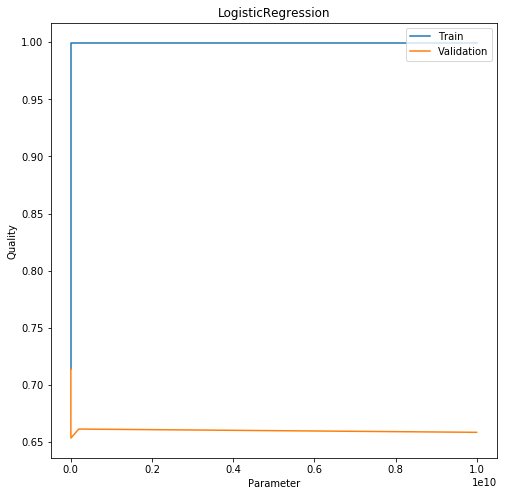

In [94]:
#LogisticRegression
qual = np.zeros((len(ns), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in cs:
        logr_ = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=i, solver="lbfgs", random_state=12345)
        qual[j][0], qual[j][1] = hyperparams_info(logr_, np.asarray(X_train), np.asarray(labels), ngrams)
        qual[j][2] = i
        j += 1
    plotting([k[0] for k in qual], [k[1] for k in qual], cs, 'LogisticRegression')
        
    tmp = max(qual, key=lambda a: a[1])
    print('------------------TRAIN_KFOLD------------------',
          'ngrams - {}'.format(ngrams),
          'C - {}'.format(tmp[-1]),
          'result validation - {}'.format(tmp[1]),
          'result train - {}'.format(tmp[0]),
          sep = '\n'
         )
    knc_ = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=tmp[-1], solver="lbfgs", random_state=12345)
    knc_.fit(X_train, y_train)
    y_pred = knc_.predict(X_test)
    print('------------------TRAIN+TEST------------------',
          'C - {}'.format(tmp[-1]),
          'Result: {}'.format(accuracy_score(y_test, y_pred))
         )

In [118]:
#MultinomialNB
qual = np.zeros((len(ns), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in alphas:
        mnb_ = MultinomialNB(alpha=i)
        qual[j][0], qual[j][1] = hyperparams_info(mnb_, np.asarray(X_train), np.asarray(labels), ngrams)
        qual[j][2] = i
        j += 1
    plotting([k[0] for k in qual], [k[1] for k in qual], alphas, 'MultinomialNB')
        
    tmp = max(qual, key=lambda a: a[1])
    print('------------------TRAIN_KFOLD------------------',
          'ngrams - {}'.format(ngrams),
          'alpha - {}'.format(tmp[-1]),
          'result validation - {}'.format(tmp[1]),
          'result train - {}'.format(tmp[0]),
          sep = '\n'
         )
    knc_ = MultinomialNB(alpha=tmp[-1])
    knc_.fit(X_train, y_train)
    y_pred = knc_.predict(X_test)
    print('------------------TRAIN+TEST------------------',
          'alpha - {}'.format(tmp[-1]),
          'Result: {}'.format(accuracy_score(y_test, y_pred))
         )


MNB alpha= 0.0001
---------------------result---------------------
-mean train:  0.9995
-mean validation:  0.74

MNB alpha= 0.000517947467923
---------------------result---------------------
-mean train:  0.999333333333
-mean validation:  0.75

MNB alpha= 0.00268269579528
---------------------result---------------------
-mean train:  0.999
-mean validation:  0.7635

MNB alpha= 0.0138949549437
---------------------result---------------------
-mean train:  0.997333333333
-mean validation:  0.7755

MNB alpha= 0.0719685673001
---------------------result---------------------
-mean train:  0.990833333333
-mean validation:  0.7915

MNB alpha= 0.372759372031
---------------------result---------------------
-mean train:  0.977166666667
-mean validation:  0.8095

MNB alpha= 1.93069772888
---------------------result---------------------
-mean train:  0.941
-mean validation:  0.78

MNB alpha= 10.0
---------------------result---------------------
-mean train:  0.842
-mean validation:  0.6975


### Ngrams = 2
[some info about choosing n-grams and cv](https://stats.stackexchange.com/questions/155483/estimating-the-best-length-of-n-gram) <br> </br>
*что означает n-gram=2?* <br> </br>
если n-gram=1 будет считать вероятность встретить определенное слово, то n-gram=2 будет парсить строку на посл-ти из двух слов.
(перекрест в одно слово: … to be or not to be …	=> …, to be, be or, or not, not to, to be, …)

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (+3 балла к сумме по всем ДЗ) 

<p>Изучите, что такое feature hashing (достаточно разобаться с документацией sklearn) и кратко опишите. Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [ ]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>В этом задании можно воспользоваться GridSearchCV</p>

# Задача 5. (опционально)
__Простой прототип (+ 2 балла к сумме по всем ДЗ)__

Напишите функцию, которая берет на вход произвольную строку и возвращает для нее предсказание для вашей задачи. Придумайте по 3 примера строк для положительного и отрицательного класса, сделайте для них предсказание. Совпадают ли ваши метки и предсказания классификатора? Оцените (любым способом), насколько придуманные вами тексты похожи на объекты датасета, с которым вы работали.


In [ ]:
def predict_class_for_text(s):
    pass